## Part 1. Explore The Data

### 1 : Import necessary modules and functions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/fries/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/fries/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/fries/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fries/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2 : Import data and find/fix the missing data

In [2]:
ks_train_df = pd.read_csv('KS_train_data.csv', delimiter=',')

- Set display options and display data frame

In [3]:
# display full column width
pd.set_option('display.max_colwidth', 1000)

# display all columns
pd.set_option('display.max_columns', 500)

# display all rows set None # default value 50
pd.set_option('display.max_rows', 50)

ks_train_df.head()

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,"I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!",art,3596,US,1325980505,USD,1334866560,1.0,2800.0,1332969260,Elsewhere Studios artist-in-residency program!,3596.0,False,3596.0,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program/rewards
1,KS_000001,82,1000 Artists is a public art-making installation on the Washington Mall which will occur on January 21 and 22nd 2013.,art,4586,US,1330926084,USD,1336440145,1.0,4500.0,1332984145,1000 Artists: Presidential Inauguration 2013,4586.0,False,4586.0,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013/rewards
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneHenge"" celebrates Community across Virtual and Real Worlds.",art,5217,US,1332382894,USD,1338175739,1.0,5000.0,1332991739,MyPhoneHenge,5217.0,False,5217.0,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/myphonehenge,https://www.kickstarter.com/projects/belveal/myphonehenge/rewards
3,KS_000003,37,A film exploring the role and value of art education today through the history of the seminal California Institute of the Arts.,art,7160,GB,1332342451,USD,1334806096,1.0,6500.0,1332991696,Walk-Through,7160.0,False,7160.0,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/1078130915/walk-through,https://www.kickstarter.com/projects/1078130915/walk-through/rewards
4,KS_000004,153,"We need to build a kitchen for Habitable Spaces, a self sustaining farm and artist residency on a ranch in Texas.",art,15445,US,1328562617,USD,1335584240,1.0,15000.0,1332992240,A kitchen for Habitable Spaces,15445.0,False,15445.0,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces/rewards


In [4]:
# print column headers
ks_train_df.columns

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')

- Some, but not all column names are self-explanatory. For the sake of clarity, we provide each feature's description below:

    project_id: number of supporters
    backers_count:
    blurb: intro
    category: type of the project
    converted_pledged_amount: money got
    country:
    created_at:  
    currency:
    deadline: 
    fx_rate: foreing exchange rate
    goal:
    launched_at: 
    name:
    pledged: money got
    staff_pick: give them a boost by helping them get exposure
    usd_pledged: money got(usd)
    location:
    funded:
    subcategory:
    project_url: 
    reward_url:

In [5]:
# missing data
ks_train_df.isnull().sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

- In total 5 rows with 6 cells have missing data. 

- Only 5 rows have missing data which is not worth further investigation compared to total 100 000 rows so we drop the rows with missing data.

In [6]:
ks_train_df.drop(ks_train_df[ks_train_df['blurb'].isnull()].index, inplace=True)
ks_train_df.drop(ks_train_df[ks_train_df['country'].isnull()].index, inplace=True)
ks_train_df.drop(ks_train_df[ks_train_df['name'].isnull()].index, inplace=True)

ks_train_df = ks_train_df.set_index('category',drop=False, append=False, inplace=False, verify_integrity=False)
ks_train_df = ks_train_df.reset_index(drop=True)

# check only 5 rows removed
len(ks_train_df)

99995

### 3 : Show the plots

- we can see that 'category' is definetly related to the 'funded', it will be clear after we transformed the 'category' feature.

<AxesSubplot:xlabel='category', ylabel='Count'>

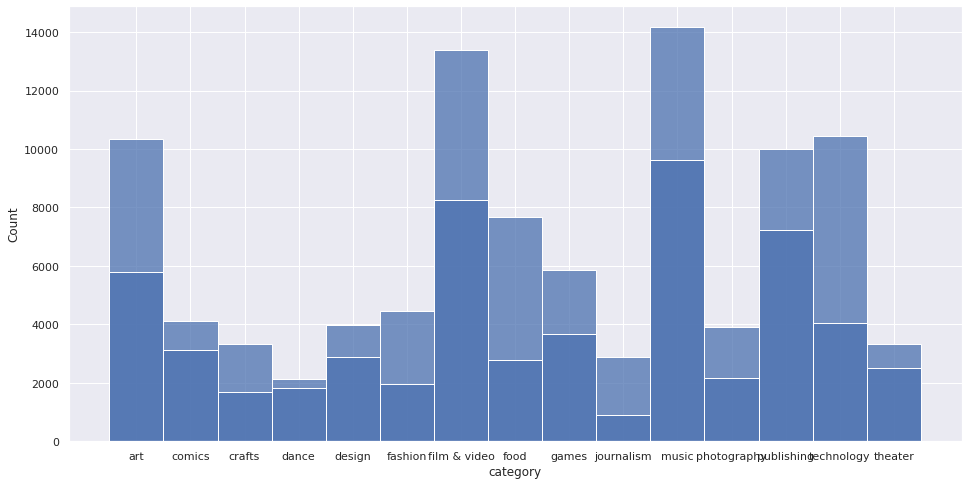

In [7]:
sns.set()
# number of projects in categories
sns.histplot(ks_train_df.category)

# number of successful projects in categories
sns.histplot(ks_train_df.loc[ks_train_df['funded'] == 1,'category'])

- make all goals in same currency

In [8]:
ks_train_df['usd_goal'] = ks_train_df.goal * ks_train_df.fx_rate

- show the project goals are related to the 'funded'. 
- We can see that correlation is weak between 'funded' and 'usd_goal', so we might need transform the 'usd_goal'

<AxesSubplot:>

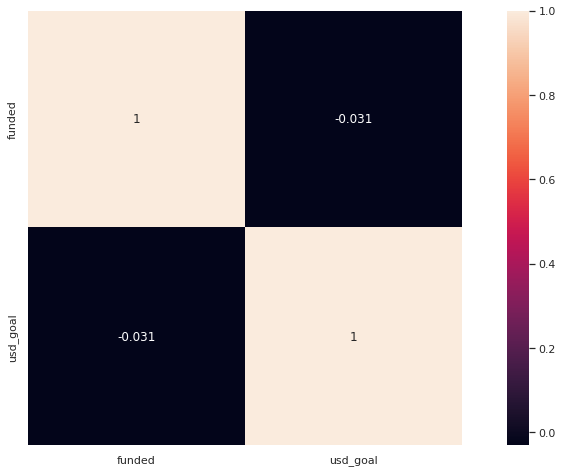

In [9]:
cols=['funded','usd_goal']
corrmat=ks_train_df[cols].corr(method='pearson')
sns.heatmap(corrmat,square=True, annot=True)

- we can see that 'staff_pick' is related to the 'funded'

<AxesSubplot:>

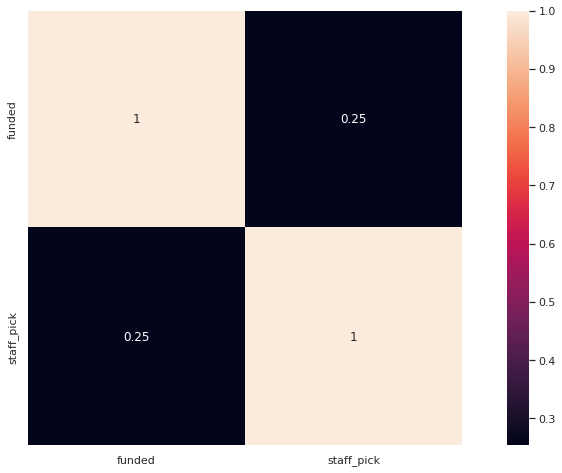

In [10]:
cols=['funded','staff_pick']
corrmat=ks_train_df[cols].corr(method='pearson')
sns.heatmap(corrmat,square=True, annot=True)

### 4 : Detect and remove outliers

- first we do 'usd_goal', from the box plot, we can see that there are some outliers.

<AxesSubplot:xlabel='funded', ylabel='usd_goal'>

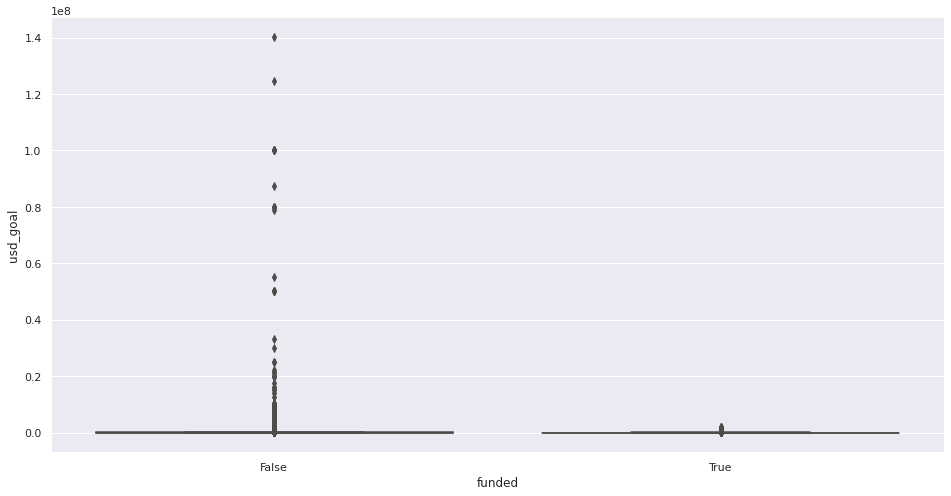

In [11]:
sns.boxplot(x=ks_train_df.funded,y=ks_train_df.usd_goal)

- Remove the outliers

In [12]:
# function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
#Detect outliers in 'usd_goals'
ks_train_df = remove_outlier(ks_train_df,'usd_goal')
ks_train_df = ks_train_df.set_index('category',drop=False, append=False, inplace=False, verify_integrity=False)
ks_train_df = ks_train_df.reset_index(drop=True)

len(ks_train_df)

88003

## Part 2.Transformation

### 1. transform the 'usd_goal'

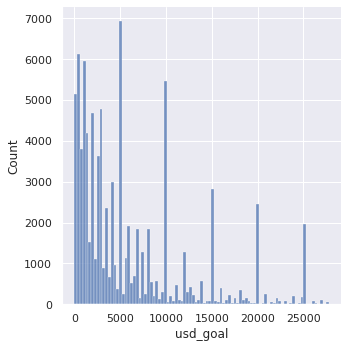

In [13]:
# distribution of usd_goal
sns.displot(ks_train_df['usd_goal'])

((array([-4.31789062, -4.11788118, -4.00904973, ...,  4.00904973,
          4.11788118,  4.31789062]),
  array([1.00000000e-02, 7.93185580e-01, 7.93185580e-01, ...,
         2.76746866e+04, 2.77000000e+04, 2.77420105e+04])),
 (5578.286577400083, 5907.404851334349, 0.9023439018356305))

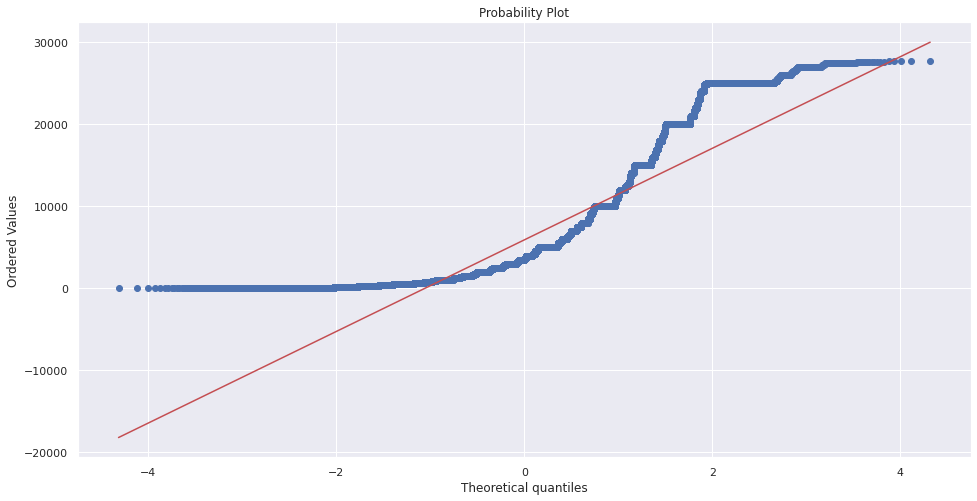

In [14]:
# probility of the usd_goal
stats.probplot(ks_train_df['usd_goal'], plot=plt)

In [15]:
# The plot is skewed so we use scaler tranform
scaler = StandardScaler()
ks_train_df['usd_goal_strd'] = scaler.fit_transform(ks_train_df[['usd_goal']])

((array([-4.31789062, -4.11788118, -4.00904973, ...,  4.00904973,
          4.11788118,  4.31789062]),
  array([-0.9556276 , -0.95550091, -0.95550091, ...,  3.5212502 ,
          3.5253451 ,  3.53214105])),
 (0.902388407695381, 4.743712327451821e-16, 0.9023439018356308))

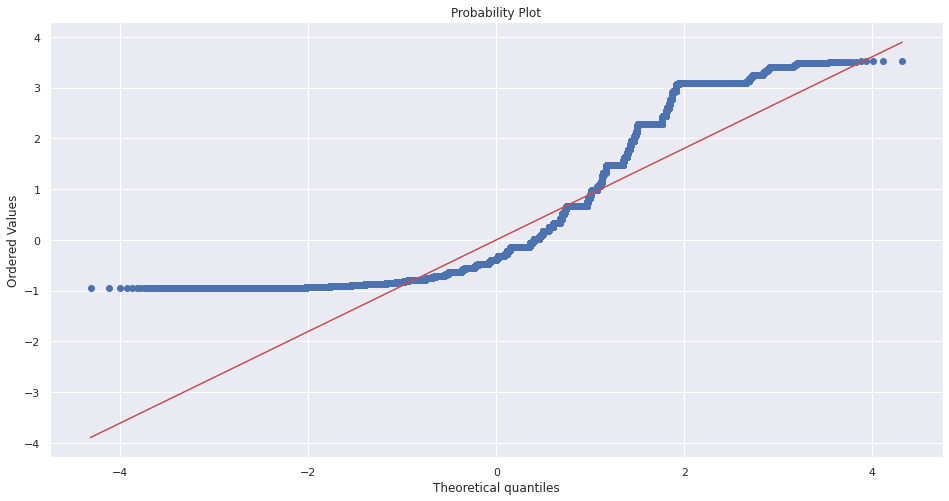

In [16]:
stats.probplot(ks_train_df['usd_goal_strd'], plot=plt)

- With Scaler-transformation, it looks more like a normal distribution.
- and the correlation with 'founded' is much stronger

- We can still see that project having a small goal has positively affected many campaigns.

<AxesSubplot:>

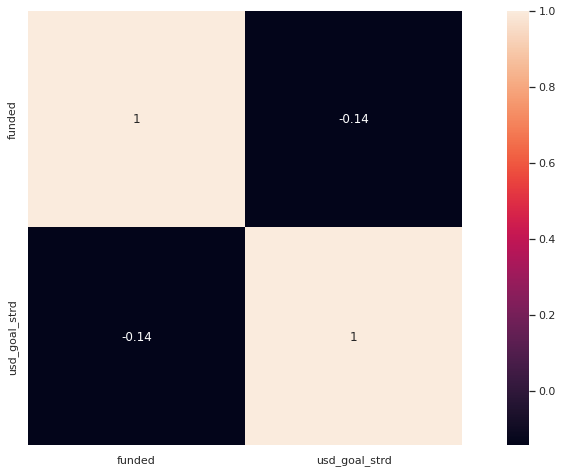

In [17]:
cols=['funded','usd_goal_strd']
corrmat=ks_train_df[cols].corr(method='pearson')
sns.heatmap(corrmat,square=True, annot=True)

### 2. transform 'category'

- subcategory transform

In [18]:
subcategory_transformed_train = pd.get_dummies(ks_train_df.subcategory)
ks_train_df = pd.concat([ks_train_df, subcategory_transformed_train], axis=1)

- category transform

In [19]:
category_transformed_train = pd.get_dummies(ks_train_df.category)

for category in category_transformed_train.columns:
    for subcategory in subcategory_transformed_train.columns:
        if(subcategory == category):
            category_transformed_train.drop(category, axis=1, inplace=True)

ks_train_df = pd.concat([ks_train_df, category_transformed_train], axis=1)


### 3. transfer currency column using one hot encoding

In [20]:
currency_transformed_train = pd.get_dummies(ks_train_df.currency)
ks_train_df = pd.concat([ks_train_df, currency_transformed_train], axis=1)

### 4. name transform

In [21]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])
v = TfidfVectorizer(ngram_range = (1,1), stop_words=my_stop_words, max_features = 30)
name_tfid = v.fit_transform(ks_train_df['name'])
name_df_train = pd.DataFrame(name_tfid.toarray(), columns=v.get_feature_names())

for column in ks_train_df:
    for name in name_df_train:
        if(column == name):
            name_df_train.drop(name, axis=1, inplace=True)

ks_train_df = pd.concat([ks_train_df, name_df_train], axis=1)

### 5. transform blurb

In [22]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

v = TfidfVectorizer(ngram_range = (1,1), stop_words=my_stop_words, max_features = 50)
blurd_tfid = v.fit_transform(ks_train_df['blurb'])
blurb_df_train = pd.DataFrame(blurd_tfid.toarray(), columns=v.get_feature_names())

for column in ks_train_df:
    for feature in blurb_df_train:
        if(column == feature):
            blurb_df_train.drop(feature, axis=1, inplace=True)

ks_train_df = pd.concat([ks_train_df, blurb_df_train], axis=1)

## Part 3.New Features

### 1. First derived feature, duration of the project.

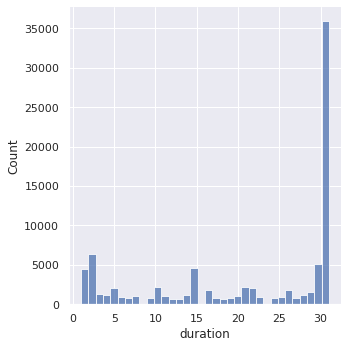

In [23]:
# convert the days and show the plot
from datetime import datetime
ks_train_df.deadline = ks_train_df.deadline.astype(int)
ks_train_df.launched_at = ks_train_df.launched_at.astype(int)
time_used = (ks_train_df.deadline - ks_train_df.launched_at)

duration = []

for unix_time in time_used:
    time = datetime.utcfromtimestamp(unix_time).strftime('%d')
    duration.append(int(time))

ks_train_df['duration'] = duration
sns.displot(ks_train_df['duration'])

- transform duration

In [24]:
duration_mean = ks_train_df['duration'].mean()
duration_std = ks_train_df['duration'].std()
ks_train_df['duration_norm'] = ks_train_df['duration'].apply(lambda x: (x - duration_mean)/duration_std)
ks_train_df['duration_norm'].describe()

count    8.800300e+04
mean     9.398222e-17
std      1.000000e+00
min     -1.797128e+00
25%     -9.065548e-01
50%      5.183630e-01
75%      8.745924e-01
max      8.745924e-01
Name: duration_norm, dtype: float64

- we can see from the following graph that 'duration_norm' is definetily related to the 'funded'

<AxesSubplot:>

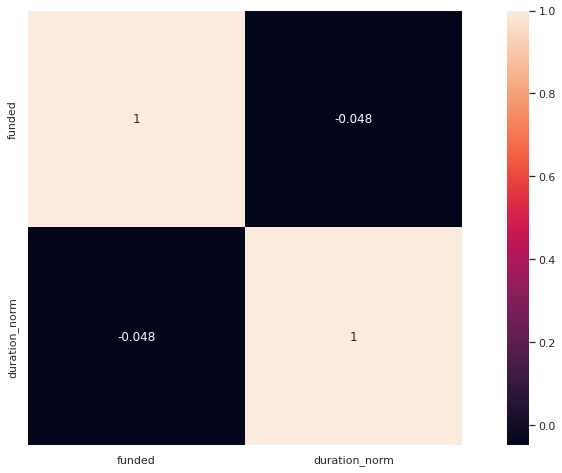

In [25]:
cols=['funded','duration_norm']
corrmat=ks_train_df[cols].corr(method='pearson')
sns.heatmap(corrmat,square=True, annot=True)

### 2. Second derived feature: has high frequency words in blurb?

- prepare the top words (will take few minutes)

In [26]:
# part of speech, it is a noun or a verb or adj. or adv.
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
s = ""
for words in ks_train_df.loc[ks_train_df['funded'] == 1,'blurb']:
    s+=words 
tokens = nltk.word_tokenize(s)  # spilt the sentence
tagged_sent = nltk.pos_tag(tokens)     # gain the part of speech of a word

wnl = nltk.WordNetLemmatizer()
lemmas_sent = []
for tag in tagged_sent:
    wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
    lemmas_sent.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) # Lemmatization

In [27]:
all_stopwords = stopwords.words('english')
all_stopwords.append('u')
tokens_without_sw = [word for word in lemmas_sent if not word in all_stopwords] #giving the stopwords and delete it

In [28]:
tags = set(['NN','JJ','RB','VB']) #only noun,adj,adv,verb is needed
pos_tag = nltk.pos_tag(tokens_without_sw)
ret = []
for word, pos in pos_tag:
        if (pos in tags):
            ret.append(word) #if it is a noun ...... then append it
freq = nltk.FreqDist(ret)
print(freq.most_common(3)) # the words with top 3  frequence in successful projects

[('new', 5025), ('book', 3650), ('help', 3634)]


In [29]:
#from dict to list
sorted_freq = dict(sorted(freq.items(), key=lambda e: e[1],reverse= True))

top_words = []
cnt = 0 
max_num = 3 # how many top words
for key, value in sorted_freq.items():
    cnt += 1
    top_words.append(key)
    if cnt > max_num-1:
        break
print(top_words)

['new', 'book', 'help']


- transform and test if blurb has top words

In [30]:
# transform the blurb
lancaster_stem = LancasterStemmer()
lower_case = ks_train_df['blurb'].apply(lambda x: x.lower())
tokenized_blurb = lower_case.apply(nltk.word_tokenize)
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
ks_train_df['blurb_cleaned'] = tokenized_blurb.apply(lemmatize_text)

In [31]:
ks_train_df['has_freq_words'] = ks_train_df['blurb_cleaned'].apply(
     lambda t_list:int(any(word in t_list for word in top_words)))

### 3. Third derived feature: Launch month.

In [32]:
ks_train_df['launch_at_date'] = pd.to_datetime(ks_train_df['launched_at'],unit='s')
ks_train_df['launch_at_month'] = ks_train_df['launch_at_date'].apply(lambda x : x.month)
ks_train_df['launch_at_month']

0         3
1         3
2         3
3         3
4         3
         ..
87998    11
87999     4
88000     6
88001     7
88002     5
Name: launch_at_month, Length: 88003, dtype: int64

<AxesSubplot:xlabel='launch_at_month', ylabel='Count'>

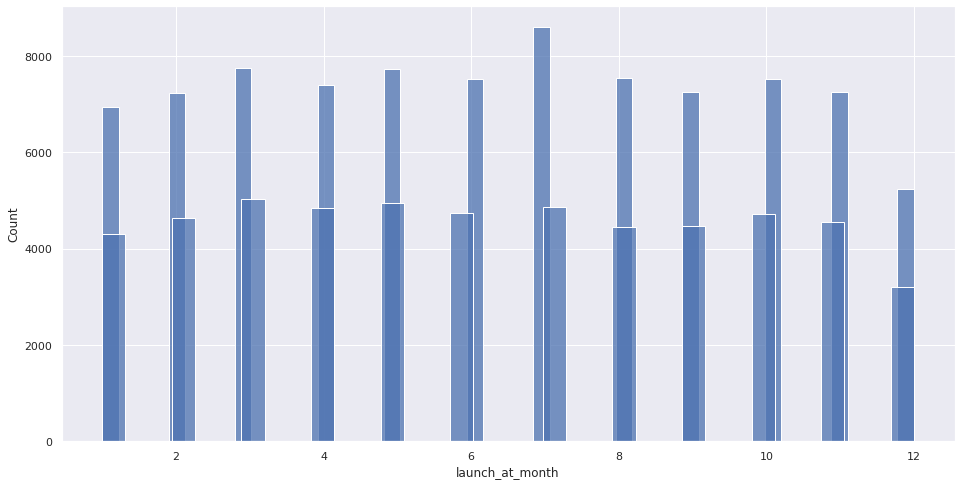

In [33]:
# launch month 
sns.histplot(ks_train_df['launch_at_month'])

# successful per month
sns.histplot(ks_train_df.loc[ks_train_df['funded'] == 1,'launch_at_month'])

<AxesSubplot:xlabel='funded', ylabel='launch_at_month'>

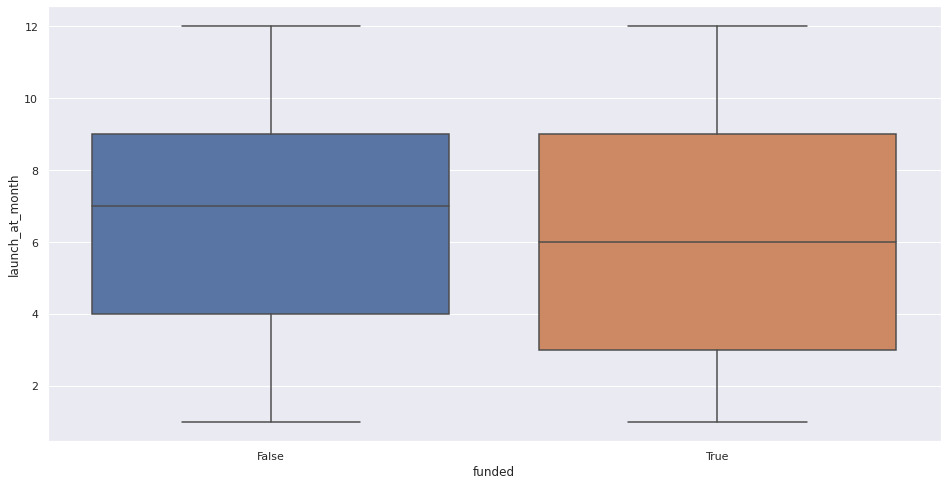

In [34]:
sns.boxplot(ks_train_df['funded'], ks_train_df.launch_at_month)

## Part 3.5 Read and Transoform test data

### 1. Preparation

In [35]:
ks_test_df = pd.read_csv('KS_test_data.csv', delimiter=';')

- transform data

In [36]:
#usd_goal_strd
ks_test_df['usd_goal'] = ks_test_df['goal'] * ks_test_df.fx_rate
scaler = StandardScaler()
ks_test_df['usd_goal_strd'] = scaler.fit_transform(ks_test_df[['usd_goal']])

In [37]:
#subcategory
subcategory_transformed_test = pd.get_dummies(ks_test_df.subcategory)
ks_test_df = pd.concat([ks_test_df, subcategory_transformed_test], axis=1)

In [38]:
#category
category_transformed_test = pd.get_dummies(ks_test_df.category)

for category in category_transformed_test.columns:
    for subcategory in subcategory_transformed_test.columns:
        if(subcategory == category):
            category_transformed_test.drop(category, axis=1, inplace=True)

ks_test_df = pd.concat([ks_test_df, category_transformed_test], axis=1)

In [39]:
#currency
currency_transformed_test = pd.get_dummies(ks_test_df.currency)
ks_test_df = pd.concat([ks_test_df, currency_transformed_test], axis=1)    

In [40]:
#blurb
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

v = TfidfVectorizer(ngram_range = (1,1), stop_words=my_stop_words, max_features = 50)
blurd_tfid = v.fit_transform(ks_test_df['blurb'].values.astype('U'))
blurb_df_test = pd.DataFrame(blurd_tfid.toarray(), columns=v.get_feature_names())

for column in ks_test_df:
    for feature in blurb_df_test:
        if(column == feature):
            blurb_df_test.drop(feature, axis=1, inplace=True)

ks_test_df = pd.concat([ks_test_df, blurb_df_test], axis=1)

In [41]:
#name
v = TfidfVectorizer(ngram_range = (1,1), stop_words=my_stop_words, max_features = 30)
name_tfid = v.fit_transform(ks_test_df['name'].values.astype('U'))
name_df_test = pd.DataFrame(name_tfid.toarray(), columns=v.get_feature_names())

for column in ks_test_df:
    for name in name_df_test:
        if(column == name):
            name_df_test.drop(name, axis=1, inplace=True)

ks_test_df = pd.concat([ks_test_df, name_df_test], axis=1)

In [42]:
# test set use only (generated) columns that are in train set
def filter_tained_columns(train_columns_name, test_column_name, columns_df):
    for test_column in test_column_name:
        column_present = False
        for train_column in train_columns_name:
            if(train_column == test_column):
                column_present = True
        if(column_present == False):
            columns_df.drop(test_column, axis = 1, inplace=True)

filter_tained_columns(category_transformed_train.columns, category_transformed_test.columns, category_transformed_test)
filter_tained_columns(subcategory_transformed_train.columns, subcategory_transformed_test.columns, subcategory_transformed_test)
filter_tained_columns(currency_transformed_train.columns, currency_transformed_test.columns, currency_transformed_test)
filter_tained_columns(blurb_df_train.columns, blurb_df_test.columns, blurb_df_test)
filter_tained_columns(name_df_train.columns, name_df_test.columns, name_df_test)



In [43]:
#launch month
ks_test_df['launch_at_date'] = pd.to_datetime(ks_test_df['launched_at'],unit='s')
ks_test_df['launch_at_month'] = ks_test_df['launch_at_date'].apply(lambda x : x.month)

In [44]:
#has high frequency words
ks_test_df['blurb'] = ks_test_df['blurb'].fillna(value = 'none')

lancaster_stem = LancasterStemmer()
lower_case = ks_test_df['blurb'].apply(lambda x: x.lower())
tokenized_blurb = lower_case.apply(nltk.word_tokenize)

ks_test_df['blurb_cleaned'] = tokenized_blurb.apply(lemmatize_text)
ks_test_df['has_freq_words'] = ks_test_df['blurb_cleaned'].apply(
     lambda t_list:int(any(word in t_list for word in top_words)))

In [45]:
#duration_norm
ks_test_df.deadline = ks_test_df.deadline.astype(int)
ks_test_df.launched_at = ks_test_df.launched_at.astype(int)
time_used = (ks_test_df.deadline - ks_test_df.launched_at)
duration = []
for unix_time in time_used:
    time = datetime.utcfromtimestamp(unix_time).strftime('%d')
    duration.append(int(time))
ks_test_df['duration'] = duration
duration_mean = ks_test_df['duration'].mean()
duration_std = ks_test_df['duration'].std()
ks_test_df['duration_norm'] = ks_test_df['duration'].apply(lambda x: (x - duration_mean)/duration_std)


## Part 4. Machine Learning

### First, make our trainning data set

In [46]:
# all_features = ['duration_norm', 'usd_goal_strd', 'staff_pick', 'has_freq_words' ,'launch_at_month'] + list(category_transformed_train.columns) +  list(currency_transformed_train.columns) +  list(subcategory_transformed_train.columns) + list(name_df_train.columns) + list(blurb_df_train.columns)
all_features = ['duration_norm', 'usd_goal_strd', 'staff_pick', 'has_freq_words', 'launch_at_month'] + list(category_transformed_test.columns) +  list(currency_transformed_test.columns) +  list(subcategory_transformed_test.columns) + list(name_df_test.columns) + list(blurb_df_test.columns)

X_kick = ks_train_df[all_features]
y_kick = ks_train_df.funded

### Model 1 : Nerual Network

- implement GridSearch (super slow)

In [47]:
#estimator = MLPClassifier()
#param_grid={
#    'hidden_layer_sizes': [(10,30,10),(20,)],
#    'activation': ['tanh'],
#    'solver': ['adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}
#gs = GridSearchCV(estimator,param_grid)
#gs.fit(X_kick,y_kick)

- cross validation

In [48]:
# cross-validation
#model = gs.best_estimator_
#cross_vals = cross_val_score(model,X_kick,y_kick,cv = 5)
#print('the accuracy is ', cross_vals.mean())

In [49]:
# cross-validation
model1 = MLPClassifier()
cross_vals = cross_val_score(model1,X_kick,y_kick,cv =2)
print('the accuracy is ', cross_vals.mean())

the accuracy is  0.6305011852182587


### Model 2: LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model=LogisticRegression()
cv=GridSearchCV(model,grid,cv=5)
cv.fit(X_kick,y_kick)

print(cv.best_params_)
print(cv.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.6725231785642344


In [51]:
cross_vals = cross_val_score(cv,X_kick,y_kick,cv = 5)
print('the accuracy is ', cross_vals.mean())

the accuracy is  0.6725231785642344


## Part 5 Predict

- predict

In [52]:
all_features = ['duration_norm', 'usd_goal_strd', 'staff_pick', 'has_freq_words', 'launch_at_month'] + list(category_transformed_test.columns) +  list(currency_transformed_test.columns) +  list(subcategory_transformed_test.columns) + list(name_df_test.columns) + list(blurb_df_test.columns)

cv.fit(X_kick,y_kick)

result_probality_1 = cv.predict_proba(ks_test_df[all_features])
result_probality_2 = cv.predict_proba(ks_test_df[all_features])

print(result_probality_1)
print(result_probality_2)

[[0.31542572 0.68457428]
 [0.47826644 0.52173356]
 [0.45780785 0.54219215]
 ...
 [0.08076362 0.91923638]
 [0.42060955 0.57939045]
 [0.39837292 0.60162708]]
[[0.31542572 0.68457428]
 [0.47826644 0.52173356]
 [0.45780785 0.54219215]
 ...
 [0.08076362 0.91923638]
 [0.42060955 0.57939045]
 [0.39837292 0.60162708]]


In [67]:
funded_prob_1=[]
funded_prob_2=[]
for prob1 in result_probality_1:
    funded_prob_1.append(prob1[1])
for prob2 in result_probality_2:
    funded_prob_2.append(prob2[1])

ks_test_df['prediction'] = (np.array(funded_prob_1) + np.array(funded_prob_2)) / 2
ks_test_df.to_csv('predictions.tsv', index = False,columns=['project_id','prediction'])

In [72]:
# estimate correct predictions
correct_predictions = cross_vals.mean() * 78065
print('number of estimate correct predictions : ', correct_predictions)

number of estimate correct predictions :  52500.521934616954
